In [3]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
%matplotlib inline


In [5]:
data = {
    'Pregnancies': np.random.randint(0, 10, 100),
    'Glucose': np.random.randint(50, 200, 100),
    'BloodPressure': np.random.randint(30, 120, 100),
    'SkinThickness': np.random.randint(10, 60, 100),
    'Insulin': np.random.randint(15, 300, 100),
    'BMI': np.random.uniform(18, 50, 100),
    'DiabetesPedigreeFunction': np.random.uniform(0.1, 2.5, 100),
    'Age': np.random.randint(21, 80, 100),
    'Outcome': np.random.randint(0, 2, 100)  # 0 for non-diabetic, 1 for diabetic
}

df = pd.DataFrame(data)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,194,40,50,77,23.186627,1.815083,47,1
1,9,65,47,39,99,28.720979,1.684552,71,1
2,8,82,67,14,246,36.048158,2.071729,77,1
3,7,185,85,25,113,28.668912,0.358238,51,1
4,4,102,45,18,226,37.745528,1.917329,79,1


In [7]:
df.isnull().sum()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Outcome', axis=1))

# Feature scaling using StandardScaler
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])


df_scaled['Outcome'] = df['Outcome']

# Display the scaled dataset
df_scaled.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.246061,1.527447,-1.192929,1.448185,-1.169041,-1.010023,0.698299,-0.206561,1
1,1.486763,-1.315443,-0.897232,0.598130,-0.901275,-0.401958,0.515489,1.295700,1
2,1.140198,-0.940798,-0.052381,-1.333813,0.887887,0.403085,1.057735,1.671265,1
3,0.793633,1.329106,0.707985,-0.483759,-0.730879,-0.407679,-1.342030,0.043816,1
4,-0.246061,-0.500040,-0.981717,-1.024703,0.644464,0.589577,0.841497,1.796454,1


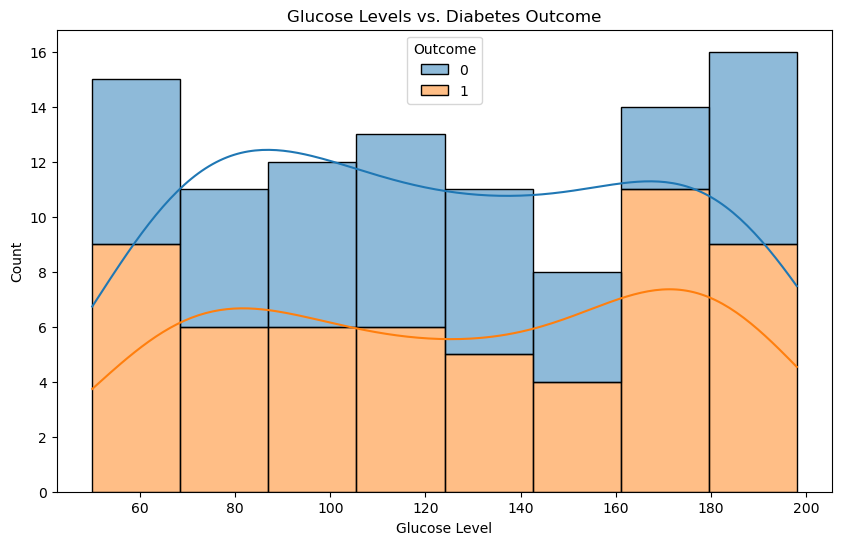

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Glucose', hue='Outcome', multiple='stack', kde=True)
plt.title('Glucose Levels vs. Diabetes Outcome')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.show()


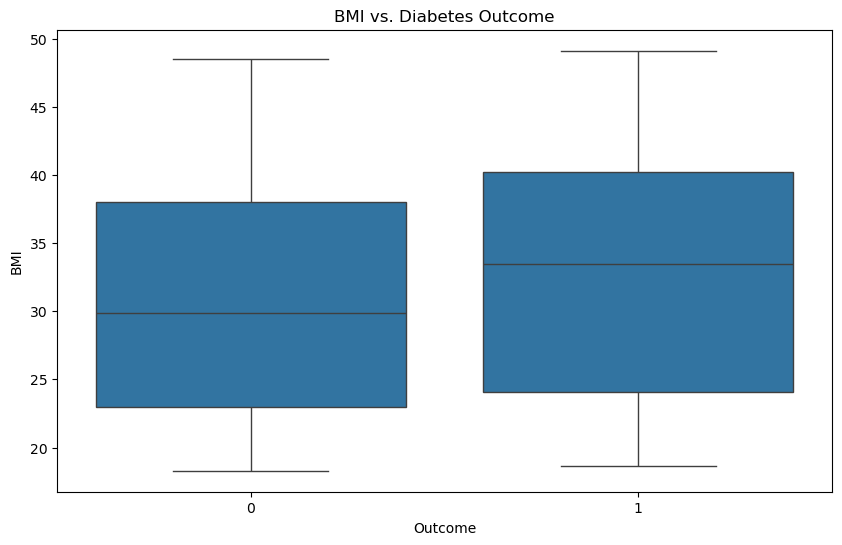

In [11]:
# Plot BMI vs. Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('BMI vs. Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.show()


In [13]:
# Define features (X) and target (y)
X = df_scaled.drop('Outcome', axis=1)
y = df_scaled['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)


LogisticRegression()